In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Data/'
#datadir2  = '/nfs/scistore15/saricgrp/bmeadowc/Scratch/Collagen/model_strict_tetramer/EquilibriumSeededWorkflow/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Mechanics/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [3]:
clrs00 = ['#A10035','#2A0944','lightsalmon','#3FA796','#FEC260','pink','#A10035','#2A0944','#3FA796']
cmap0 = plt.cm.get_cmap('Spectral_r') #YlOrBr
cmap1 = plt.cm.get_cmap('YlOrBr') #YlOrBr
#cmap2 = plt.cm.get_cmap('twilight') #twilight
cmap2 = plt.cm.get_cmap('GnBu') #twilight
cmap3 = plt.cm.get_cmap('BuPu') #twilight
clrs = ['#a6611a','#dfc27d','#80cdc1','#018571','#f5f5f5']
clrs2 = ['#ffffcc','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']
clrs3 = ['#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#0c2c84']


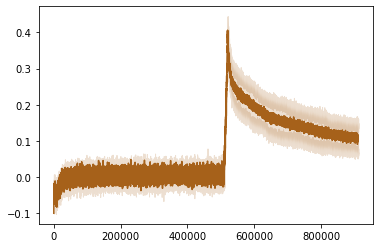

In [4]:
file = 'stressprofile.dat'
#Time Avstress stdstress
stress = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')

Time = stress.Time
StressXAv = stress.Avstress
StressXStd = stress.stdstress

fig,ax = plt.subplots()

ax.plot(Time,StressXAv,color = clrs[0])
ax.fill_between(Time,np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = clrs[0])

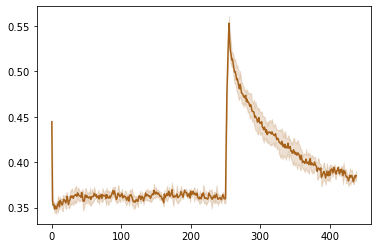

In [5]:
file = 'alignment.dat'
#Time AvMSq AvMSqStd
almnt = pandas.read_csv(datadir+file, sep = ' ', header = 'infer')

time = almnt.Time
AvMSq = almnt.AvMSq
AvMSqStd = almnt.AvMSqStd

fig,ax = plt.subplots()
ax.plot(time,AvMSq,color = clrs[0])
ax.fill_between(time,np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = clrs[0])

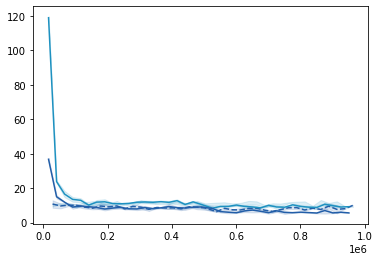

In [6]:
file1 = 'breaking_7s.dat'
file2 = 'breaking_nc1.dat'
file3 = 'making_7s.dat'
file4 = 'making_nc1.dat'
#Time AvMSq AvMSqStd
bm1 = pandas.read_csv(datadir+file1, sep = ' ', header = 'infer')
bm2 = pandas.read_csv(datadir+file2, sep = ' ', header = 'infer')
bm3 = pandas.read_csv(datadir+file3, sep = ' ', header = 'infer')
bm4 = pandas.read_csv(datadir+file4, sep = ' ', header = 'infer')
#Time Break7sav Break7sstd\n')
#f2.write('Time BreakNC1av BreakNC1std\n')
#f3.write('Time Make7sav Make7sstd\n')
#f4.write('Time MakeNC1av MakeNC1avstd\n')
TimeBreak = bm1.Time
TimeMake = bm3.Time
Break7sav = bm1.Break7sav
Break7sstd = bm1.Break7sstd
BreakNC1av = bm2.BreakNC1av
BreakNC1std = bm2.BreakNC1std
Make7sav = bm3.Make7sav
Make7sstd = bm3.Make7sstd
MakeNC1av = bm4.MakeNC1av
MakeNC1std = bm4.MakeNC1avstd

fig,ax = plt.subplots()

ax.fill_between(TimeBreak,np.add(BreakNC1av,BreakNC1std),np.add(BreakNC1av,-BreakNC1std),alpha = 0.15,color = clrs3[2])
ax.plot(TimeBreak,Break7sav,color = clrs3[3],linestyle = '--',label = "Broken 7s")
ax.fill_between(TimeBreak,np.add(Break7sav,Break7sstd),np.add(Break7sav,-Break7sstd),alpha = 0.15,color = clrs3[3])
ax.plot(TimeMake,MakeNC1av,color = clrs3[2],label = "Made NC1")
ax.fill_between(TimeMake,np.add(MakeNC1av,MakeNC1std),np.add(MakeNC1av,-MakeNC1std),alpha = 0.15,color =clrs3[2])
ax.plot(TimeMake,Make7sav,color = clrs3[3],label = "Made 7s")
ax.fill_between(TimeMake,np.add(Make7sav,Make7sstd),np.add(Make7sav,-Make7sstd),alpha = 0.15,color = clrs3[3])

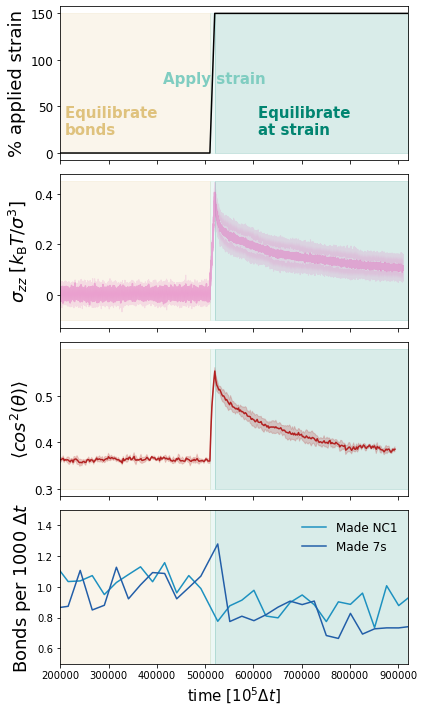

In [11]:
t_mix=10000
t_stretch=10000
t_relax=400000
t_bonds=500000
#Volume in time:
Vol = 72*72*12
strain = 1.5
VolTime = []
tstrcount = 0
for t in range(len(Time)):
    if Time[t] <= t_mix+t_bonds:
        VolTime.append(Vol)
    if Time[t] > t_mix+t_bonds and Time[t] <= t_mix+t_bonds + t_stretch:
        VolTime.append(Vol+Vol*strain*(Time[tstrcount]/t_stretch))
        tstrcount+=1
    if Time[t] > t_mix+t_bonds + t_stretch:
        VolTime.append((1+strain)*Vol)


#Setting up Plotting 
alph = 0.15
UBS = [150,0.45,0.6,20]
LBS = [0,-0.1,0.3,0]
#fig,ax=plt.subplots(4,1,figsize = (6,12))
fig,ax=plt.subplots(4,1,figsize = (6,10))
for i in range(4):
    #ax[i].fill_between([0,t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[0])
    ax[i].fill_between([t_mix,t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[1])
    ax[i].fill_between([t_bonds+t_mix,t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[2])
    ax[i].fill_between([t_stretch+t_bonds+t_mix,t_relax+t_stretch+t_bonds+t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[3])
    ax[i].set_xlim([20000,t_relax+t_stretch+t_bonds+t_mix])


times = [0,t_mix,t_mix+t_bonds,t_mix+t_bonds+t_stretch,t_mix+t_bonds+t_stretch+t_relax]

text1 = "Mix protomers"
text2 = "Equilibrate \nbonds"
text3 = "Apply strain"
text4 = "Equilibrate \nat strain"
fs1 = 15
fs2 = 18
#ax[0].text(-1000,75,text1,color = clrs[0],fontsize =fs1,fontweight='bold')
ax[0].text(t_mix+200000,20,text2,color = clrs[1],fontsize =fs1,fontweight='bold')
ax[0].text(t_bonds+t_mix-98000,75,text3,color = clrs[2],fontsize =fs1,fontweight='bold')
ax[0].text(t_bonds+t_mix+100000,20,text4,color = clrs[3],fontsize =fs1,fontweight='bold')

#Plotting protocol

strains  = [0,0,0,100*strain,100*strain]
ax[0].set_ylabel("% applied strain",fontsize =fs2)
#ax[0].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ax[0].plot(times,strains,color = "black")

#Plotting stress 
ax[1].fill_between(Time,np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = "tab:pink")
ax[1].plot(Time,StressXAv,color = "tab:pink",alpha = 0.5)
ax[1].set_ylabel(r"$\sigma_{zz} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =fs2)
#ax[1].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)


#Plotting alignment

frame = 2040
ax[2].plot(np.multiply(time,frame),AvMSq,alpha = 1,color = 'firebrick')
ax[2].fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = 'firebrick')
ax[2].set_ylabel(r'$\langle cos^{2}(\theta)\rangle$',fontsize =fs2)
#ax[2].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ms=3


#Plotting bonds

#ax[3].plot(TimeBreak,BreakNC1av,color = clrs3[2],linestyle = '--',label = "Broken NC1")
#ax[3].fill_between(TimeBreak,np.add(BreakNC1av,BreakNC1std),np.add(BreakNC1av,-BreakNC1std),alpha = 0.15,color = clrs3[2])
#ax[3].plot(TimeBreak,Break7sav,color = clrs3[3],linestyle = '--',label = "Broken 7s")
#ax[3].fill_between(TimeBreak,np.add(Break7sav,Break7sstd),np.add(Break7sav,-Break7sstd),alpha = 0.15,color = clrs3[3])
#ax[3].plot(TimeMake,MakeNC1av,color = clrs3[2],label = "Made NC1")
#ax[3].fill_between(TimeMake,np.add(MakeNC1av,MakeNC1std),np.add(MakeNC1av,-MakeNC1std),alpha = 0.15,color =clrs3[2])
#ax[3].plot(TimeMake,Make7sav,color = clrs3[3],label = "Made 7s")
ax[3].plot(TimeMake,np.divide(MakeNC1av,BreakNC1av),color = clrs3[2],label = "Made NC1")
ax[3].plot(TimeMake,np.divide(Make7sav,Break7sav),color = clrs3[3],label = "Made 7s")
#ax[3].fill_between(TimeMake,np.add(Make7sav,Make7sstd),np.add(Make7sav,-Make7sstd),alpha = 0.15,color = clrs3[3])
#ax[3].set_ylim([5,17])
ax[3].set_ylim([0.5,1.5])
ax[0].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[1].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[2].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[3].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])

ax[0].set_yticks([0,50,100,150],['0','50','100','150'],fontsize = 12)
ax[1].set_yticks([0,0.2,0.4],['0','0.2','0.4'],fontsize = 12)
ax[2].set_yticks([0.3,0.4,0.5],['0.3','0.4','0.5'],fontsize = 12)
#ax[3].set_yticks([5,10,15],['5','10','15'],fontsize = 12)
#ax[3].set_xticks([200000,400000,600000,800000],['2','4','6','8'],fontsize = 12)

#ax[3].legend(frameon=False,ncols=2,fontsize = 12)
ax[3].legend(frameon=False,fontsize = 12)
ax[3].set_ylabel(r"Bonds per 1000 $\Delta t$",fontsize =fs2)
ax[3].set_xlabel(r"time [$10^5\Delta t$]",fontsize =fs1)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])

fig.tight_layout()
plotname = "MasterMechanics_ChemEng5.0_seedsV2_IvanEdits.pdf"
plotname = "MasterMechanics_ChemEng5.0_seedsV2_IvanEdits.png"
#fig.savefig(plotsdir+plotname)



0


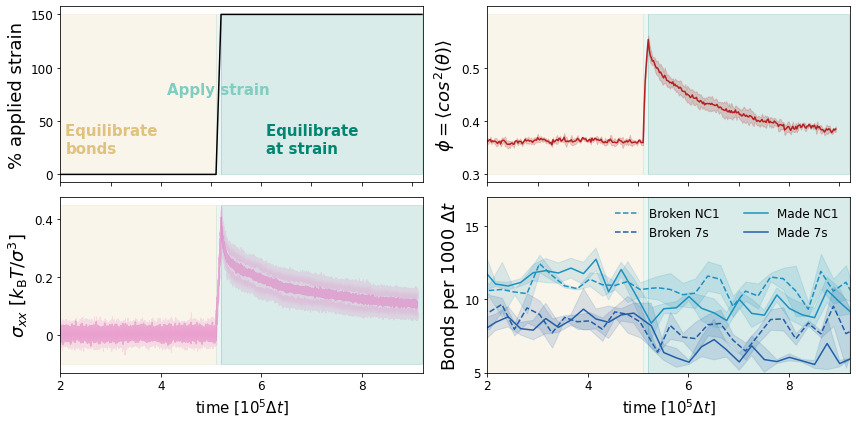

In [8]:
t_mix=10000
t_stretch=10000
t_relax=400000
t_bonds=500000
#Volume in time:
Vol = 72*72*12
strain = 1.5
VolTime = []
tstrcount = 0
for t in range(len(Time)):
    if Time[t] <= t_mix+t_bonds:
        VolTime.append(Vol)
    if Time[t] > t_mix+t_bonds and Time[t] <= t_mix+t_bonds + t_stretch:
        VolTime.append(Vol+Vol*strain*(Time[tstrcount]/t_stretch))
        tstrcount+=1
    if Time[t] > t_mix+t_bonds + t_stretch:
        VolTime.append((1+strain)*Vol)


#Setting up Plotting 
alph = 0.15
UBS = [[150,0.6],[0.45,20]]
LBS = [[0,0.3],[-0.1,0]]
print(LBS[0][0])
#fig,ax=plt.subplots(4,1,figsize = (6,12))
fig,ax=plt.subplots(2,2,figsize = (12,6))
for i in range(2):
    for ii in range(2):
    #ax[i].fill_between([0,t_mix],[LBS[i],LBS[i]],[UBS[i],UBS[i]],alpha = alph,color = clrs[0])
        ax[i,ii].fill_between([t_mix,t_bonds+t_mix],[LBS[i][ii],LBS[i][ii]],[UBS[i][ii],UBS[i][ii]],alpha = alph,color = clrs[1])
        ax[i,ii].fill_between([t_bonds+t_mix,t_stretch+t_bonds+t_mix],[LBS[i][ii],LBS[i][ii]],[UBS[i][ii],UBS[i][ii]],alpha = alph,color = clrs[2])
        ax[i,ii].fill_between([t_stretch+t_bonds+t_mix,t_relax+t_stretch+t_bonds+t_mix],[LBS[i][ii],LBS[i][ii]],[UBS[i][ii],UBS[i][ii]],alpha = alph,color = clrs[3])
        ax[i,ii].set_xlim([20000,t_relax+t_stretch+t_bonds+t_mix])


times = [0,t_mix,t_mix+t_bonds,t_mix+t_bonds+t_stretch,t_mix+t_bonds+t_stretch+t_relax]

text1 = "Mix protomers"
text2 = "Equilibrate \nbonds"
text3 = "Apply strain"
text4 = "Equilibrate \nat strain"
fs1 = 15
fs2 = 18
#ax[0].text(-1000,75,text1,color = clrs[0],fontsize =fs1,fontweight='bold')
ax[0,0].text(t_mix+200000,20,text2,color = clrs[1],fontsize =fs1,fontweight='bold')
ax[0,0].text(t_bonds+t_mix-98000,75,text3,color = clrs[2],fontsize =fs1,fontweight='bold')
ax[0,0].text(t_bonds+t_mix+100000,20,text4,color = clrs[3],fontsize =fs1,fontweight='bold')

#Plotting protocol

strains  = [0,0,0,100*strain,100*strain]
ax[0,0].set_ylabel("% applied strain",fontsize =fs2)
#ax[0].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ax[0,0].plot(times,strains,color = "black")

#Plotting stress 
ax[1,0].fill_between(Time,np.add(StressXAv,StressXStd),np.add(StressXAv,-StressXStd),alpha = 0.2,color = "tab:pink")
ax[1,0].plot(Time,StressXAv,color = "tab:pink",alpha = 0.5)
ax[1,0].set_ylabel(r"$\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =fs2)
#ax[1].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)


#Plotting alignment

frame = 2040
ax[0,1].plot(np.multiply(time,frame),AvMSq,alpha = 1,color = 'firebrick')
ax[0,1].fill_between(np.multiply(time,frame),np.add(AvMSq,AvMSqStd),np.add(AvMSq,-AvMSqStd),alpha = 0.2,color = 'firebrick')
ax[0,1].set_ylabel(r'$\phi=\langle cos^{2}(\theta)\rangle$',fontsize =fs2)
#ax[2].set_xlabel(r"time [$\Delta t$]",fontsize =fs1)
ms=3


#Plotting bonds

ax[1,1].plot(TimeBreak,BreakNC1av,color = clrs3[2],linestyle = '--',label = "Broken NC1")
ax[1,1].fill_between(TimeBreak,np.add(BreakNC1av,BreakNC1std),np.add(BreakNC1av,-BreakNC1std),alpha = 0.15,color = clrs3[2])
ax[1,1].plot(TimeBreak,Break7sav,color = clrs3[3],linestyle = '--',label = "Broken 7s")
ax[1,1].fill_between(TimeBreak,np.add(Break7sav,Break7sstd),np.add(Break7sav,-Break7sstd),alpha = 0.15,color = clrs3[3])
ax[1,1].plot(TimeMake,MakeNC1av,color = clrs3[2],label = "Made NC1")
ax[1,1].fill_between(TimeMake,np.add(MakeNC1av,MakeNC1std),np.add(MakeNC1av,-MakeNC1std),alpha = 0.15,color =clrs3[2])
ax[1,1].plot(TimeMake,Make7sav,color = clrs3[3],label = "Made 7s")
ax[1,1].fill_between(TimeMake,np.add(Make7sav,Make7sstd),np.add(Make7sav,-Make7sstd),alpha = 0.15,color = clrs3[3])
ax[1,1].set_ylim([5,17])
ax[0,0].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[1,0].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[0,1].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])
ax[1,1].set_xlim([200000,t_relax+t_stretch+t_bonds+t_mix+1000])

ax[0,0].set_yticks([0,50,100,150],['0','50','100','150'],fontsize = 12)
ax[1,0].set_yticks([0,0.2,0.4],['0','0.2','0.4'],fontsize = 12)
ax[0,1].set_yticks([0.3,0.4,0.5],['0.3','0.4','0.5'],fontsize = 12)
ax[1,1].set_yticks([5,10,15],['5','10','15'],fontsize = 12)
ax[1,1].set_xticks([200000,400000,600000,800000],['2','4','6','8'],fontsize = 12)
ax[1,0].set_xticks([200000,400000,600000,800000],['2','4','6','8'],fontsize = 12)

ax[1,1].legend(frameon=False,ncol=2,fontsize = 12)
#ax[1,1].legend(frameon=False,fontsize = 12)
ax[1,1].set_ylabel(r"Bonds per 1000 $\Delta t$",fontsize =fs2)
ax[1,1].set_xlabel(r"time [$10^5\Delta t$]",fontsize =fs1)
ax[1,0].set_xlabel(r"time [$10^5\Delta t$]",fontsize =fs1)

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
#ax[2].set_xticklabels([])

fig.tight_layout()
plotname = "MasterMechanics.pdf"
#plotname = "MasterMechanics_ChemEng5.0_seedsV2_IvanEdits.png"
#fig.savefig(plotsdir+plotname)



In [ ]:
## Thesis layout